In [492]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Bài 1

In [493]:
def conv_2d(input,kernel):
    input_dimension = len(input.shape)

    if input_dimension==1:
        result = np.zeros(input.shape[0] + kernel.shape[0] - 1)
        for i in range(input.shape[0]):
            for j in range(kernel.shape[0]):
                result[i+j] += input[i]*kernel[j]
        result = result[kernel.shape[0]-2:input.shape[0]+kernel.shape[0]-2]
    if input_dimension==2:
        result = np.zeros((input.shape[0]+kernel.shape[0]-1,input.shape[1]+kernel.shape[1]-1))
        for x in range(input.shape[0]):
            for y in range(input.shape[1]):
                result[x:x+kernel.shape[0],y:y+kernel.shape[1]] += input[x,y]*kernel
        if kernel.shape[0]%2==0:
            subtract_x = kernel.shape[0]//2 - 1
        else:
            subtract_x = kernel.shape[0]//2
        if kernel.shape[1]%2==0:
            subtract_y = kernel.shape[1]//2 - 1
        else:
            subtract_y = kernel.shape[1]//2
        result = result[subtract_x:input.shape[0]+subtract_x,subtract_y:input.shape[1]+subtract_y]

    if input_dimension==3:
        red_channel = conv_2d(input[:,:,0],kernel)
        green_channel = conv_2d(input[:,:,1],kernel)
        blue_channel = conv_2d(input[:,:,2],kernel)
        result = np.dstack((red_channel,green_channel,blue_channel))
    return result

In [494]:
# test 1 dimension convolution
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([1,0,-1])
print(*conv_2d(x,y).astype(int))
print(*scipy.signal.convolve(x,y,mode='same'))

2 2 2 2 2 2 2 2 -8
2 2 2 2 2 2 2 2 -8


In [495]:
# random 2d array 10x10
x = np.random.randint(0,10,(10,10))
kernel = np.random.randint(0,10,(5,5))
print(conv_2d(x,kernel).astype(int))
print(scipy.signal.convolve2d(x,kernel,mode='same'))

[[182 213 271 366 354 421 460 496 418 309]
 [239 318 412 416 387 480 522 564 415 324]
 [361 410 522 450 528 588 539 595 510 351]
 [442 403 580 641 475 511 545 596 373 344]
 [405 428 606 556 519 508 595 561 353 368]
 [378 473 582 548 494 503 489 426 387 307]
 [329 435 499 562 401 344 496 315 358 248]
 [363 471 531 566 479 466 537 444 360 251]
 [295 292 389 443 410 318 321 378 225 155]
 [180 202 346 277 209 257 268 270 154 143]]
[[182 213 271 366 354 421 460 496 418 309]
 [239 318 412 416 387 480 522 564 415 324]
 [361 410 522 450 528 588 539 595 510 351]
 [442 403 580 641 475 511 545 596 373 344]
 [405 428 606 556 519 508 595 561 353 368]
 [378 473 582 548 494 503 489 426 387 307]
 [329 435 499 562 401 344 496 315 358 248]
 [363 471 531 566 479 466 537 444 360 251]
 [295 292 389 443 410 318 321 378 225 155]
 [180 202 346 277 209 257 268 270 154 143]]


In [496]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[1,2,3],[3,4,6]])
print(conv_2d(x,kernel).astype(int))
print(scipy.signal.convolve2d(x,kernel,mode='same'))

[[  4  10  12]
 [ 23  51  51]
 [ 53 108  96]]
[[  4  10  12]
 [ 23  51  51]
 [ 53 108  96]]


# Bài 2

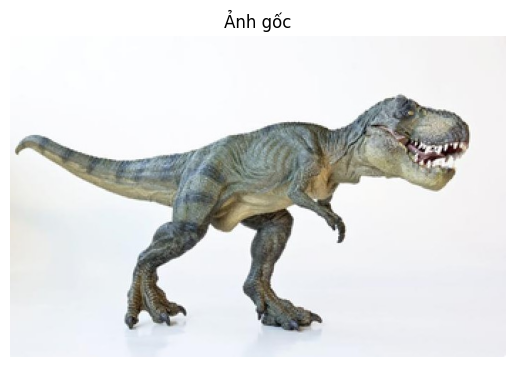

In [497]:
img = cv2.imread('302843992_485786496928626_6191234182030738228_n (1).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')
plt.show()

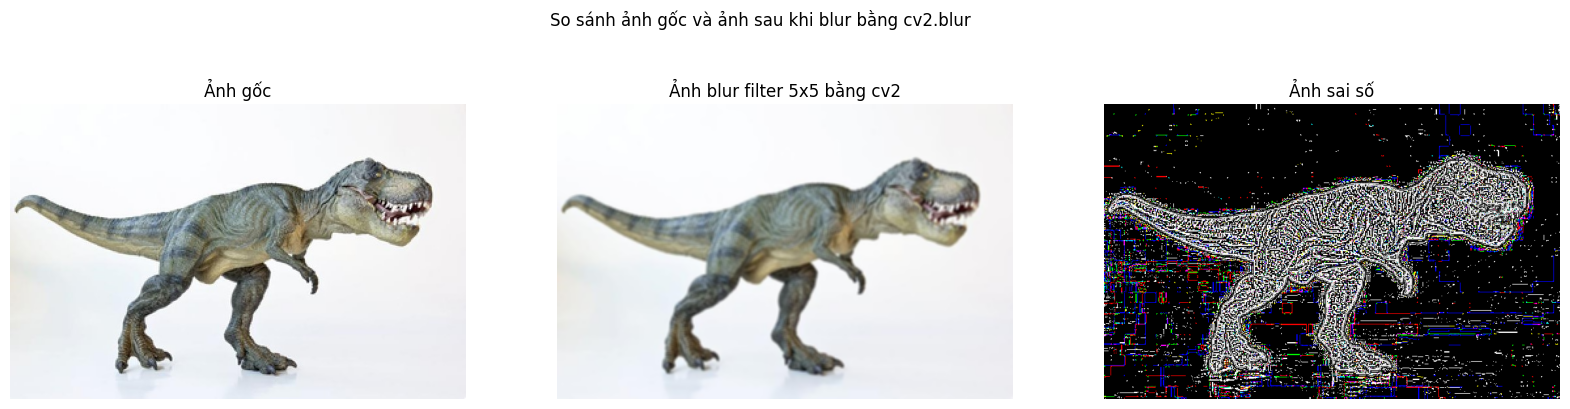

In [498]:
img_blur_cv2 = cv2.blur(img,(5,5))
img_diff = np.abs(img - img_blur_cv2)

plt.figure(figsize=(20,5))
plt.suptitle('So sánh ảnh gốc và ảnh sau khi blur bằng cv2.blur')
plt.subplot(1,3,1)
plt.title('Ảnh gốc')
plt.imshow(img)
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Ảnh blur filter 5x5 bằng cv2')
plt.imshow(img_blur_cv2)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Ảnh sai số')
plt.imshow(img_diff)
plt.axis('off')
plt.show()

In [499]:
def diff_plot(img1,img2):
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,1)
    plt.title('Hàm tự code')
    plt.imshow(img1)
    plt.axis('off')

    plt.subplot(3,3,2)
    plt.title('Dùng cv2')
    plt.imshow(img2)
    plt.axis('off')

    plt.subplot(3,3,3)
    plt.title('Ảnh sai số')
    img_diff = np.abs(img1 - img2)
    plt.imshow(img_diff)
    plt.axis('off')
    plt.show()

Kernel 3x3


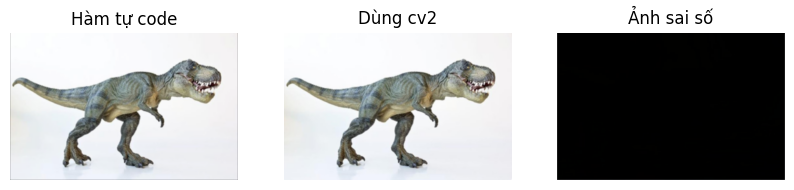

Kernel 5x5


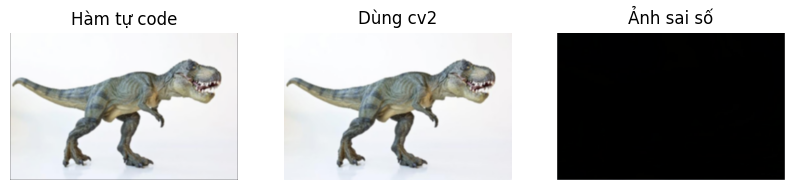

Kernel 7x7


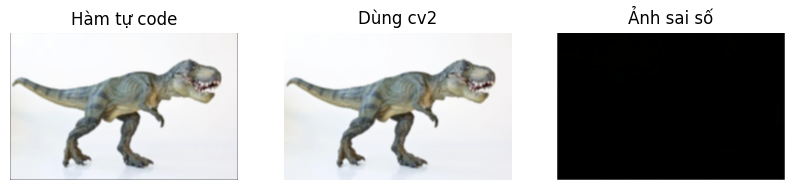

In [500]:
img = cv2.imread('302843992_485786496928626_6191234182030738228_n (1).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = np.ones((3,3))/9
blur = conv_2d(img,kernel).astype(int)
blur_cv = cv2.blur(img,(3,3))
print('Kernel 3x3')
diff_plot(blur,blur_cv)

kernel = np.ones((5,5))/25
blur = conv_2d(img,kernel).astype(int)
blur_cv = cv2.blur(img,(5,5))
print('Kernel 5x5')
diff_plot(blur,blur_cv)

kernel = np.ones((7,7))/49
blur = conv_2d(img,kernel).astype(int)
blur_cv = cv2.blur(img,(7,7))
print('Kernel 7x7')
diff_plot(blur,blur_cv)

# Bài 3

In [501]:
img = cv2.imread('302843992_485786496928626_6191234182030738228_n (1).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [502]:
cv2.getGaussianKernel(5,1)

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

Gaussian kernel 3x3


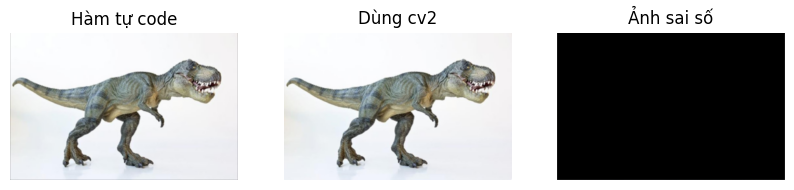

Gaussian kernel 5x5


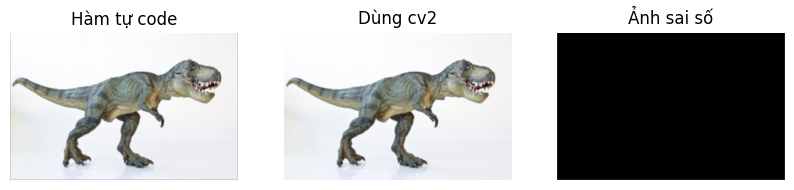

In [503]:
gaussian_kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
gaussian_blur = conv_2d(img,gaussian_kernel).astype(int)
gaussian_blur_cv2 = cv2.GaussianBlur(img,(3,3),0)
print('Gaussian kernel 3x3')
diff_plot(gaussian_blur,gaussian_blur_cv2)

gaussian_kernel = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256
gaussian_blur = conv_2d(img,gaussian_kernel).astype(int)
gaussian_blur_cv2 = cv2.GaussianBlur(img,(5,5),0)
print('Gaussian kernel 5x5')
diff_plot(gaussian_blur,gaussian_blur_cv2)

# Bài 4

In [504]:
def median(arr):
    arr = np.sort(arr)
    m = len(arr)//2
    if len(arr)%2 == 0:
        return (arr[m-1] + arr[m])/2
    else:
        return arr[m]

def conv_2d_median(input,kernel):
    # take the median in the kernel
    input_dimension = len(input.shape)
    if input_dimension==2:
        kernel_half_x = kernel.shape[0]//2
        kernel_half_y = kernel.shape[1]//2
        result = np.zeros(input.shape)
        for i in range(kernel_half_x,input.shape[0]-kernel_half_x):
            for j in range(kernel_half_y,input.shape[1]-kernel_half_y):
                result[i,j] = median(input[i-kernel_half_x:i+kernel_half_x+1,j-kernel_half_y:j+kernel_half_y+1].flatten())

    if input_dimension==3:
        red_channel = conv_2d_median(input[:,:,0],kernel)
        green_channel = conv_2d_median(input[:,:,1],kernel)
        blue_channel = conv_2d_median(input[:,:,2],kernel)
        result = np.dstack((red_channel,green_channel,blue_channel))
    return result

In [505]:
img = cv2.imread('302843992_485786496928626_6191234182030738228_n (1).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Median kernel 3x3


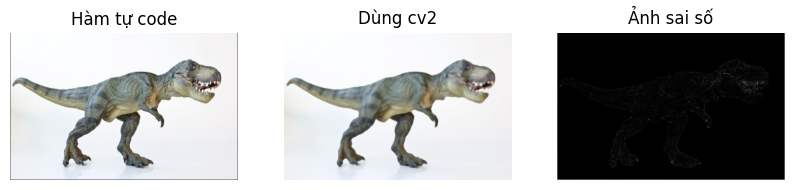

Median kernel 5x5


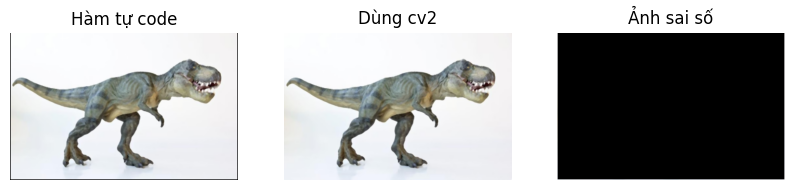

In [506]:
median_kernel = np.ones((3,3))
median_blur = conv_2d_median(img,median_kernel).astype(int)
median_blur_cv2 = cv2.medianBlur(img,7)
print('Median kernel 3x3')
diff_plot(median_blur,median_blur_cv2)

median_kernel = np.ones((5,5))
median_blur = conv_2d_median(img,median_kernel).astype(int)
median_blur_cv2 = cv2.medianBlur(img,5)
print('Median kernel 5x5')
diff_plot(median_blur,median_blur_cv2)

median_kernel = np.ones((7,7))
median_blur = conv_2d_median(img,median_kernel).astype(int)
median_blur_cv2 = cv2.medianBlur(img,7)
print('Median kernel 7x7')
diff_plot(median_blur,median_blur_cv2)